In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([1,np.nan,3])
display(A)
np.isnan(A)

array([ 1., nan,  3.])

array([False,  True, False])

In [3]:
import pandas as pd
df = pd.DataFrame(A)
display(df)
df.isnull()

,0
0,1.0
1,NaN
2,3.0


,0
0,False
1,True
2,False


----------------- 1.0
***************** 0.8187307530779818
+++++++++++++++++ 1.3498588075760032


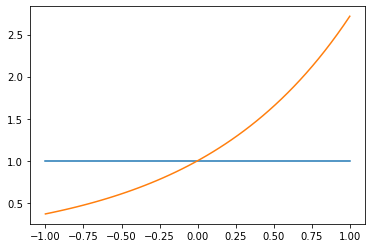

In [4]:
x = np.linspace(-1,1,50)

y = np.exp(x)
print('-----------------',np.exp(0))
print('*****************',np.exp(-0.2))
print('+++++++++++++++++',np.exp(0.3))
plt.plot(x,np.full(50,fill_value=1))
plt.plot(x,y)

# 手撕代码

In [5]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier

import graphviz
from sklearn import tree

X = np.arange(10).reshape(-1,1) # 二维，机器学习要求数据必须是二维的

y = np.array([1,1,1,-1,-1,-1,1,1,1,-1])
display(X,y)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

## 使用Adaboost建模

In [6]:
# SAMMER表示构建树时候，采用相同的裂分方式
model = AdaBoostClassifier(n_estimators=3,algorithm = 'SAMME')

model.fit(X,y)

y_ = model.predict(X)
display(y,y_) # 准确率是100%

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

## 第一课可视化

第一棵树是什么： DecisionTreeClassifier(max_depth=1, random_state=1977272916)


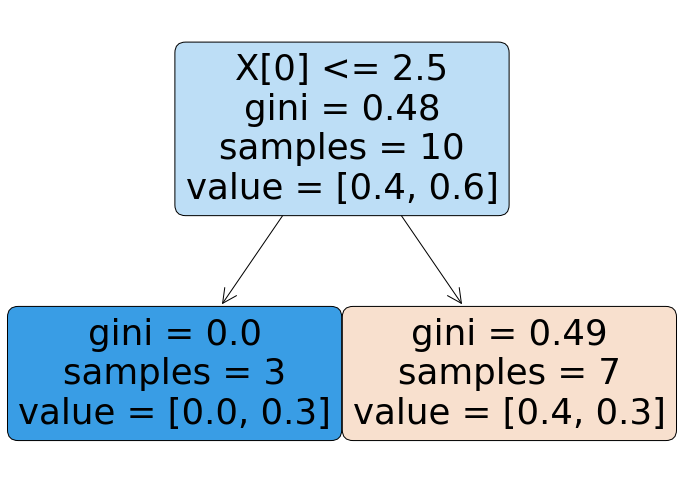

In [7]:
print('第一棵树是什么：',model[0])
# dot_data = tree.export_graphviz(model[0],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(model[0],filled=True,rounded=True)

## 第二棵树可视化

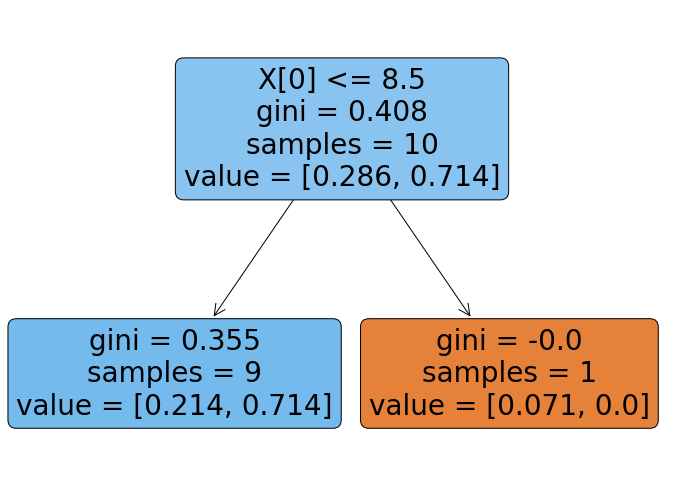

In [8]:
# dot_data = tree.export_graphviz(model[1],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(model[1],filled=True,rounded=True)

## 第三棵树可视化

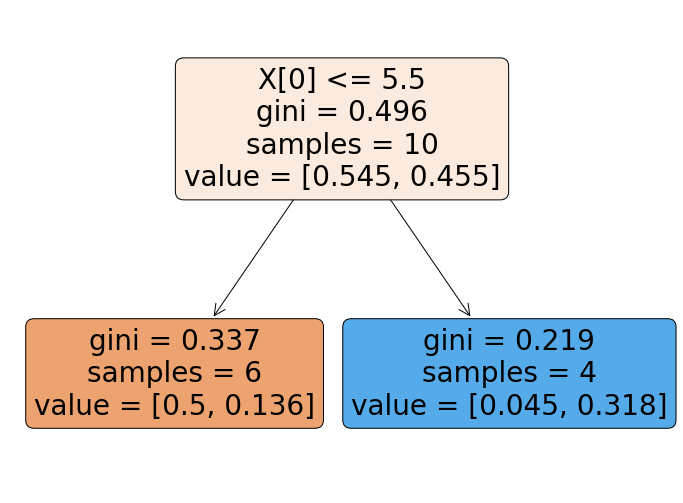

In [9]:
# graphviSourceSource(tree.export_graphviz(model[2],filled=True,rounded=True))
plt.figure(figsize=(12,9))
_ = tree.plot_tree(model[2],filled=True,rounded=True)

# 第一棵树代码构建

## gini系数计算

𝑔𝑖𝑛𝑖=∑𝑖=1𝑁𝑝𝑖(1−𝑝𝑖)

In [10]:
y # 6个正1,4个-1
# 正1比例是0.6
# 负1比例0.4

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

In [11]:
w1 = np.full(shape = 10,fill_value=0.1) # 初始的样本权重

cond = y == 1 # 类别1条件
p1 = w1[cond].sum()
p2 = 1- p1
display(p1,p2)

gini1 = p1 * (1-p1) + p2 * (1 - p2)
print('方式一计算gini系数：',gini1)

gini2 = 1 - p1**2 - p2**2
print('方式二计算gini系数：',gini2)

0.6

0.4

方式一计算gini系数： 0.48
方式二计算gini系数： 0.48


## 拆分条件计算

In [12]:
X.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
gini_result = []
best_split = {} # 最佳裂分条件，X[0] <=2.5
lower_gini = 1 # 比较

for i in range(len(X) - 1):
    split = X[i:i+2].mean() # 裂分条件
    cond = (X <= split).ravel() # 变成一维的，左边数据
    left = y[cond]
    right = y[~cond] # 取反
    
    # 左右两个边的gini系数
    gini_left = 0
    gini_right = 0
    for j in np.unique(y): # y表示类别
        p_left = (left == j).sum()/left.size # 计算左边某个类别的概率
        gini_left += p_left * (1 - p_left)
        p_right = (right == j).sum()/right.size # 计算右边某个类别的概率
        gini_right += p_right * (1 - p_right)
    # 左右两边的gini系数合并
    left_p = cond.sum()/cond.size
    right_p = 1 - left_p
    gini = gini_left * left_p + gini_right * right_p
    gini_result.append(gini)
    if gini < lower_gini:
        lower_gini = gini
        best_split.clear()
        best_split['X[0] <='] = split
print(gini_result)
print('最佳裂分条件是：')
print(best_split)

[0.4444444444444444, 0.4, 0.3428571428571428, 0.45, 0.48, 0.45, 0.47619047619047616, 0.475, 0.4]
最佳裂分条件是：
{'X[0] <=': 2.5}


In [14]:
0.7*0.49

0.34299999999999997

In [15]:
np.unique(y)

array([-1,  1])

In [16]:
X.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 计算误差

In [17]:
y1_ = model[0].predict(X) # 扁鹊医院某个大夫问诊情况

error1 = (y != y1_).mean()
error1

0.3

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y,y1_)

0.7

In [19]:
accuracy = (y == y1_).mean()
accuracy

0.7

## 计算第一个弱学习器（决策树、大夫）的权重

𝛼𝑡=12𝑙𝑛1−𝑒𝑡𝑒𝑡=12𝑙𝑛𝑝𝑡1−𝑝𝑡

In [20]:
alpha_1 = 1/2 * np.log((1 - error1)/error1)
alpha_1

0.42364893019360184

In [21]:
alpha_1 = 1/2 * np.log(accuracy/(1 - accuracy))
alpha_1

0.4236489301936017

## 更新一下样本权重

In [22]:
w1 # 没有进行训练和学习，所以都一样

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

𝑤𝑡+1=[𝑤𝑡∗𝑒𝑥𝑝(−𝑦ℎ𝑡(𝑥)𝛼𝑡)]

In [23]:
# 上一次权重的基础上进行更新

# y 表示真实的目标值
# ht(x)表示当前弱学习器预测的结果
w2 = w1 * np.exp(-alpha_1 * y * y1_)
w2 = w2/w2.sum()# 权重归一化，和正好是1
display(w1,w2)
display(y,y1_)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

array([0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
       0.07142857, 0.16666667, 0.16666667, 0.16666667, 0.07142857])

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

array([ 1,  1,  1, -1, -1, -1, -1, -1, -1, -1])

# 第二棵树代码构建

In [24]:
y

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

In [25]:
cond = y == -1
np.round(w2[cond].sum(),3)

0.286

In [26]:
cond2 = y == 1
np.round(w2[cond2].sum(),3)

0.714

## gini系数计算

In [27]:
print(w2)

cond = y == 1 # 类别1条件
p1 = w2[cond].sum() # !!!注意使用新的样本权重分布
p2 = 1- p1
display(p1,p2)

gini1 = p1 * (1-p1) + p2 * (1 - p2)
print('方式一计算gini系数：',gini1)

gini2 = 1 - p1**2 - p2**2
print('方式二计算gini系数：',gini2)

[0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.16666667 0.16666667 0.16666667 0.07142857]


0.7142857142857142

0.2857142857142858

方式一计算gini系数： 0.4081632653061225
方式二计算gini系数： 0.4081632653061225


## 拆分条件计算

In [28]:
gini_result = []
best_split = {} # 最佳裂分条件，X[0] <=2.5
lower_gini = 1 # 比较

for i in range(len(X) - 1):
    split = X[i:i+2].mean() # 裂分条件
    cond = (X <= split).ravel() # 变成一维的，左边数据
    left = y[cond]
    right = y[~cond] # 取反
    
    # left_p = cond.sum()/cond.size # 这种方式计算概率适用于 每个样本的权重一样
    left_p = w2[cond]/w2[cond].sum() # 归一化，左侧每个样本在自己组内的概率
    right_p = w2[~cond]/w2[~cond].sum() # 归一化右侧每个样本在自己组内概率
    
    # 左右两个边的gini系数
    gini_left = 0
    gini_right = 0
    for j in np.unique(y): # y表示类别{-1,1}
        cond_left = left == j # 左侧某个类别
        p1 = left_p[cond_left].sum() # 左侧某个类别的概率
        gini_left += p1 * (1 - p1)
        cond_right = right == j # 右侧某个类别的判断条件
        p2 = right_p[cond_right].sum() # 右侧某个类别的概率
        gini_right += p2 * (1 - p2)
    
    # 左右两边的gini系数合并
    p1 = cond.sum()/cond.size # 左侧划分数据所占的比例
    p2 = 1 - p1 # 右侧划分数据所占的比例
    gini = gini_left * p1 + gini_right * p2
    gini_result.append(gini)
    if gini < lower_gini:
        lower_gini = gini
        best_split.clear()
        best_split['X[0] <='] = split
print(gini_result)
print('最佳裂分条件是：')
print(best_split)

[0.3834319526627219, 0.3555555555555556, 0.3239669421487603, 0.402, 0.41283950617283954, 0.3875, 0.40975723183391, 0.4074375, 0.31952662721893493]
最佳裂分条件是：
{'X[0] <=': 8.5}


## 计算误差

In [29]:
y2_ = model[1].predict(X) # 扁鹊医院某个大夫问诊情况

error2 = (y != y2_).mean()
error2

0.3

In [30]:
error2 = ((y != y2_) * w2).sum()
error2

0.21428571428571427

## 计算第二个弱学习器权重

In [31]:
alpha_2 = 1/2 * np.log((1 - error2)/error2)
alpha_2

0.6496414920651304

## 更新样本权重

In [32]:
# 上一次权重的基础上进行更新

# y 表示真实的目标值
# ht(x)表示当前弱学习器预测的结果
w3 = w2 * np.exp(-alpha_2 * y * y2_)
w3 = w3/w3.sum()# 权重归一化，和正好是1
w3

array([0.04545455, 0.04545455, 0.04545455, 0.16666667, 0.16666667,
       0.16666667, 0.10606061, 0.10606061, 0.10606061, 0.04545455])

# 第三棵树代码构建

## gini系数

In [33]:
cond = y == 1 # 类别1条件
p1 = w3[cond].sum() # !!!注意使用新的样本权重分布
p2 = 1- p1
display(p1,p2)

gini1 = p1 * (1-p1) + p2 * (1 - p2)
print('方式一计算gini系数：',np.round(gini1,3))

gini2 = 1 - p1**2 - p2**2
print('方式二计算gini系数：',gini2)

0.4545454545454546

0.5454545454545454

方式一计算gini系数： 0.496
方式二计算gini系数： 0.4958677685950414


## 拆分条件计算

In [34]:
gini_result = []
best_split = {} # 最佳裂分条件，X[0] <=2.5
lower_gini = 1 # 比较

for i in range(len(X) - 1):
    split = X[i:i+2].mean() # 裂分条件
    cond = (X <= split).ravel() # 变成一维的，左边数据
    left = y[cond]
    right = y[~cond] # 取反
    
    # left_p = cond.sum()/cond.size # 这种方式计算概率适用于 每个样本的权重一样
    left_p = w3[cond]/w3[cond].sum() # 归一化，左侧每个样本在自己组内的概率
    right_p = w3[~cond]/w3[~cond].sum() # 归一化右侧每个样本在自己组内概率
    
    # 左右两个边的gini系数
    gini_left = 0
    gini_right = 0
    for j in np.unique(y): # y表示类别{-1,1}
        cond_left = left == j # 左侧某个类别
        p1 = left_p[cond_left].sum() # 左侧某个类别的概率
        gini_left += p1 * (1 - p1)
        cond_right = right == j # 右侧某个类别的判断条件
        p2 = right_p[cond_right].sum() # 右侧某个类别的概率
        gini_right += p2 * (1 - p2)
    
    # 左右两边的gini系数合并
    p1 = cond.sum()/cond.size # 左侧划分数据所占的比例
    p2 = 1 - p1 # 右侧划分数据所占的比例
    gini = gini_left * p1 + gini_right * p2
    gini_result.append(gini)
    if gini < lower_gini:
        lower_gini = gini
        best_split.clear()
        best_split['X[0] <='] = split
print(gini_result)
print('最佳裂分条件是：')
print(best_split)

[0.44081632653061226, 0.384, 0.3257617728531856, 0.4957315689981096, 0.44603537981269514, 0.2895408163265306, 0.3950689519505281, 0.4712448979591837, 0.44897959183673475]
最佳裂分条件是：
{'X[0] <=': 5.5}


## 计算误差

In [35]:
y3_ = model[2].predict(X) # 扁鹊医院某个大夫问诊情况

error3 = ((y != y3_) * w3).sum()
error3

0.18181818181818185

## 计算第三个弱学习器权重

In [36]:
alpha_3 = 1/2 * np.log((1 - error3)/error3)
alpha_3

0.752038698388137

## 更新权重

In [37]:
# 上一次权重的基础上进行更新

# y 表示真实的目标值
# ht(x)表示当前弱学习器预测的结果
w4 = w3 * np.exp(-alpha_3 * y * y3_)
w4 = w4/w4.sum()# 权重归一化，和正好是1
w4

array([0.125     , 0.125     , 0.125     , 0.10185185, 0.10185185,
       0.10185185, 0.06481481, 0.06481481, 0.06481481, 0.125     ])

# 弱学习器聚合

In [38]:
print('每一个弱分类器的预测结果：')
display(y1_,y2_,y3_)

# 聚合各个弱学习器的评分
F =  alpha_1* y1_ + alpha_2*y2_ + alpha_3*y3_
# 将多个弱分类器，整合，变成了强分类器F(X)
print('强分类器合并结果：\n',F)
print('强分类器最终结果如下：\n',np.array([1 if i > 0 else -1 for i in F]))

print('算法预测结果：\n',model.predict(X))

每一个弱分类器的预测结果：


array([ 1,  1,  1, -1, -1, -1, -1, -1, -1, -1])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

array([-1, -1, -1, -1, -1, -1,  1,  1,  1,  1])

强分类器合并结果：
 [ 0.32125172  0.32125172  0.32125172 -0.52604614 -0.52604614 -0.52604614
  0.97803126  0.97803126  0.97803126 -0.32125172]
强分类器最终结果如下：
 [ 1  1  1 -1 -1 -1  1  1  1 -1]
算法预测结果：
 [ 1  1  1 -1 -1 -1  1  1  1 -1]


# 算法VS自己代码

In [39]:
model.estimator_errors_ # 三棵树的误差情况

array([0.3       , 0.21428571, 0.18181818])

In [40]:
model.estimator_weights_ # 权重 == 话语权

array([0.84729786, 1.29928298, 1.5040774 ])

In [41]:
print('自己计算的误差是：',error1,np.round(error2,8),np.round(error3,8))

自己计算的误差是： 0.3 0.21428571 0.18181818


In [42]:
print('自己计算的弱学习器的权重',np.round(2*alpha_1,8),np.round(2 * alpha_2,8),np.round(2*alpha_3,8))

自己计算的弱学习器的权重 0.84729786 1.29928298 1.5040774


## 计算概率

In [43]:
model.predict_proba(X) # 类别大，划分到对应哪个类别

array([[0.45611407, 0.54388593],
       [0.45611407, 0.54388593],
       [0.45611407, 0.54388593],
       [0.57155357, 0.42844643],
       [0.57155357, 0.42844643],
       [0.57155357, 0.42844643],
       [0.36916261, 0.63083739],
       [0.36916261, 0.63083739],
       [0.36916261, 0.63083739],
       [0.54388593, 0.45611407]])

In [44]:
model.predict(X)

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

In [45]:
y1_

array([ 1,  1,  1, -1, -1, -1, -1, -1, -1, -1])

In [46]:
# 计算类别概率
y1_proba = (y1_ == np.array([[-1],[1]])).T.astype(np.int8)
y1_proba

array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int8)

In [47]:
y2_proba = (y2_ == np.array([[-1],[1]])).T.astype(np.int8)
y2_proba

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0]], dtype=int8)

In [48]:
y3_proba = (y3_ == np.array([[-1],[1]])).T.astype(np.int8)
y3_proba

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int8)

## 计算的弱学习器的概率之和

In [49]:
proba = y1_proba * alpha_1 * 2 + y2_proba * alpha_2 * 2 + y3_proba * alpha_3 *2
proba /= (alpha_1  + alpha_2 + alpha_3)*2
proba

array([[0.4120017 , 0.5879983 ],
       [0.4120017 , 0.5879983 ],
       [0.4120017 , 0.5879983 ],
       [0.64409624, 0.35590376],
       [0.64409624, 0.35590376],
       [0.64409624, 0.35590376],
       [0.23209454, 0.76790546],
       [0.23209454, 0.76790546],
       [0.23209454, 0.76790546],
       [0.5879983 , 0.4120017 ]])

第一列符号翻转（第一列和第二列差异增大，源码中查到）

In [50]:
proba[:,0] *= -1
proba

array([[-0.4120017 ,  0.5879983 ],
       [-0.4120017 ,  0.5879983 ],
       [-0.4120017 ,  0.5879983 ],
       [-0.64409624,  0.35590376],
       [-0.64409624,  0.35590376],
       [-0.64409624,  0.35590376],
       [-0.23209454,  0.76790546],
       [-0.23209454,  0.76790546],
       [-0.23209454,  0.76790546],
       [-0.5879983 ,  0.4120017 ]])

In [51]:
# 求和，融合
proba = proba.sum(axis = 1)
proba

array([ 0.1759966 ,  0.1759966 ,  0.1759966 , -0.28819249, -0.28819249,
       -0.28819249,  0.53581091,  0.53581091,  0.53581091, -0.1759966 ])

In [52]:
# 拆分，
proba = np.vstack([-proba,proba]).T/2
proba

array([[-0.0879983 ,  0.0879983 ],
       [-0.0879983 ,  0.0879983 ],
       [-0.0879983 ,  0.0879983 ],
       [ 0.14409624, -0.14409624],
       [ 0.14409624, -0.14409624],
       [ 0.14409624, -0.14409624],
       [-0.26790546,  0.26790546],
       [-0.26790546,  0.26790546],
       [-0.26790546,  0.26790546],
       [ 0.0879983 , -0.0879983 ]])

In [53]:
# softmax归一化
np.exp(proba)/(np.exp(proba)).sum(axis = 1).reshape(-1,1)

array([[0.45611407, 0.54388593],
       [0.45611407, 0.54388593],
       [0.45611407, 0.54388593],
       [0.57155357, 0.42844643],
       [0.57155357, 0.42844643],
       [0.57155357, 0.42844643],
       [0.36916261, 0.63083739],
       [0.36916261, 0.63083739],
       [0.36916261, 0.63083739],
       [0.54388593, 0.45611407]])

In [54]:
model.predict_proba(X)

array([[0.45611407, 0.54388593],
       [0.45611407, 0.54388593],
       [0.45611407, 0.54388593],
       [0.57155357, 0.42844643],
       [0.57155357, 0.42844643],
       [0.57155357, 0.42844643],
       [0.36916261, 0.63083739],
       [0.36916261, 0.63083739],
       [0.36916261, 0.63083739],
       [0.54388593, 0.45611407]])